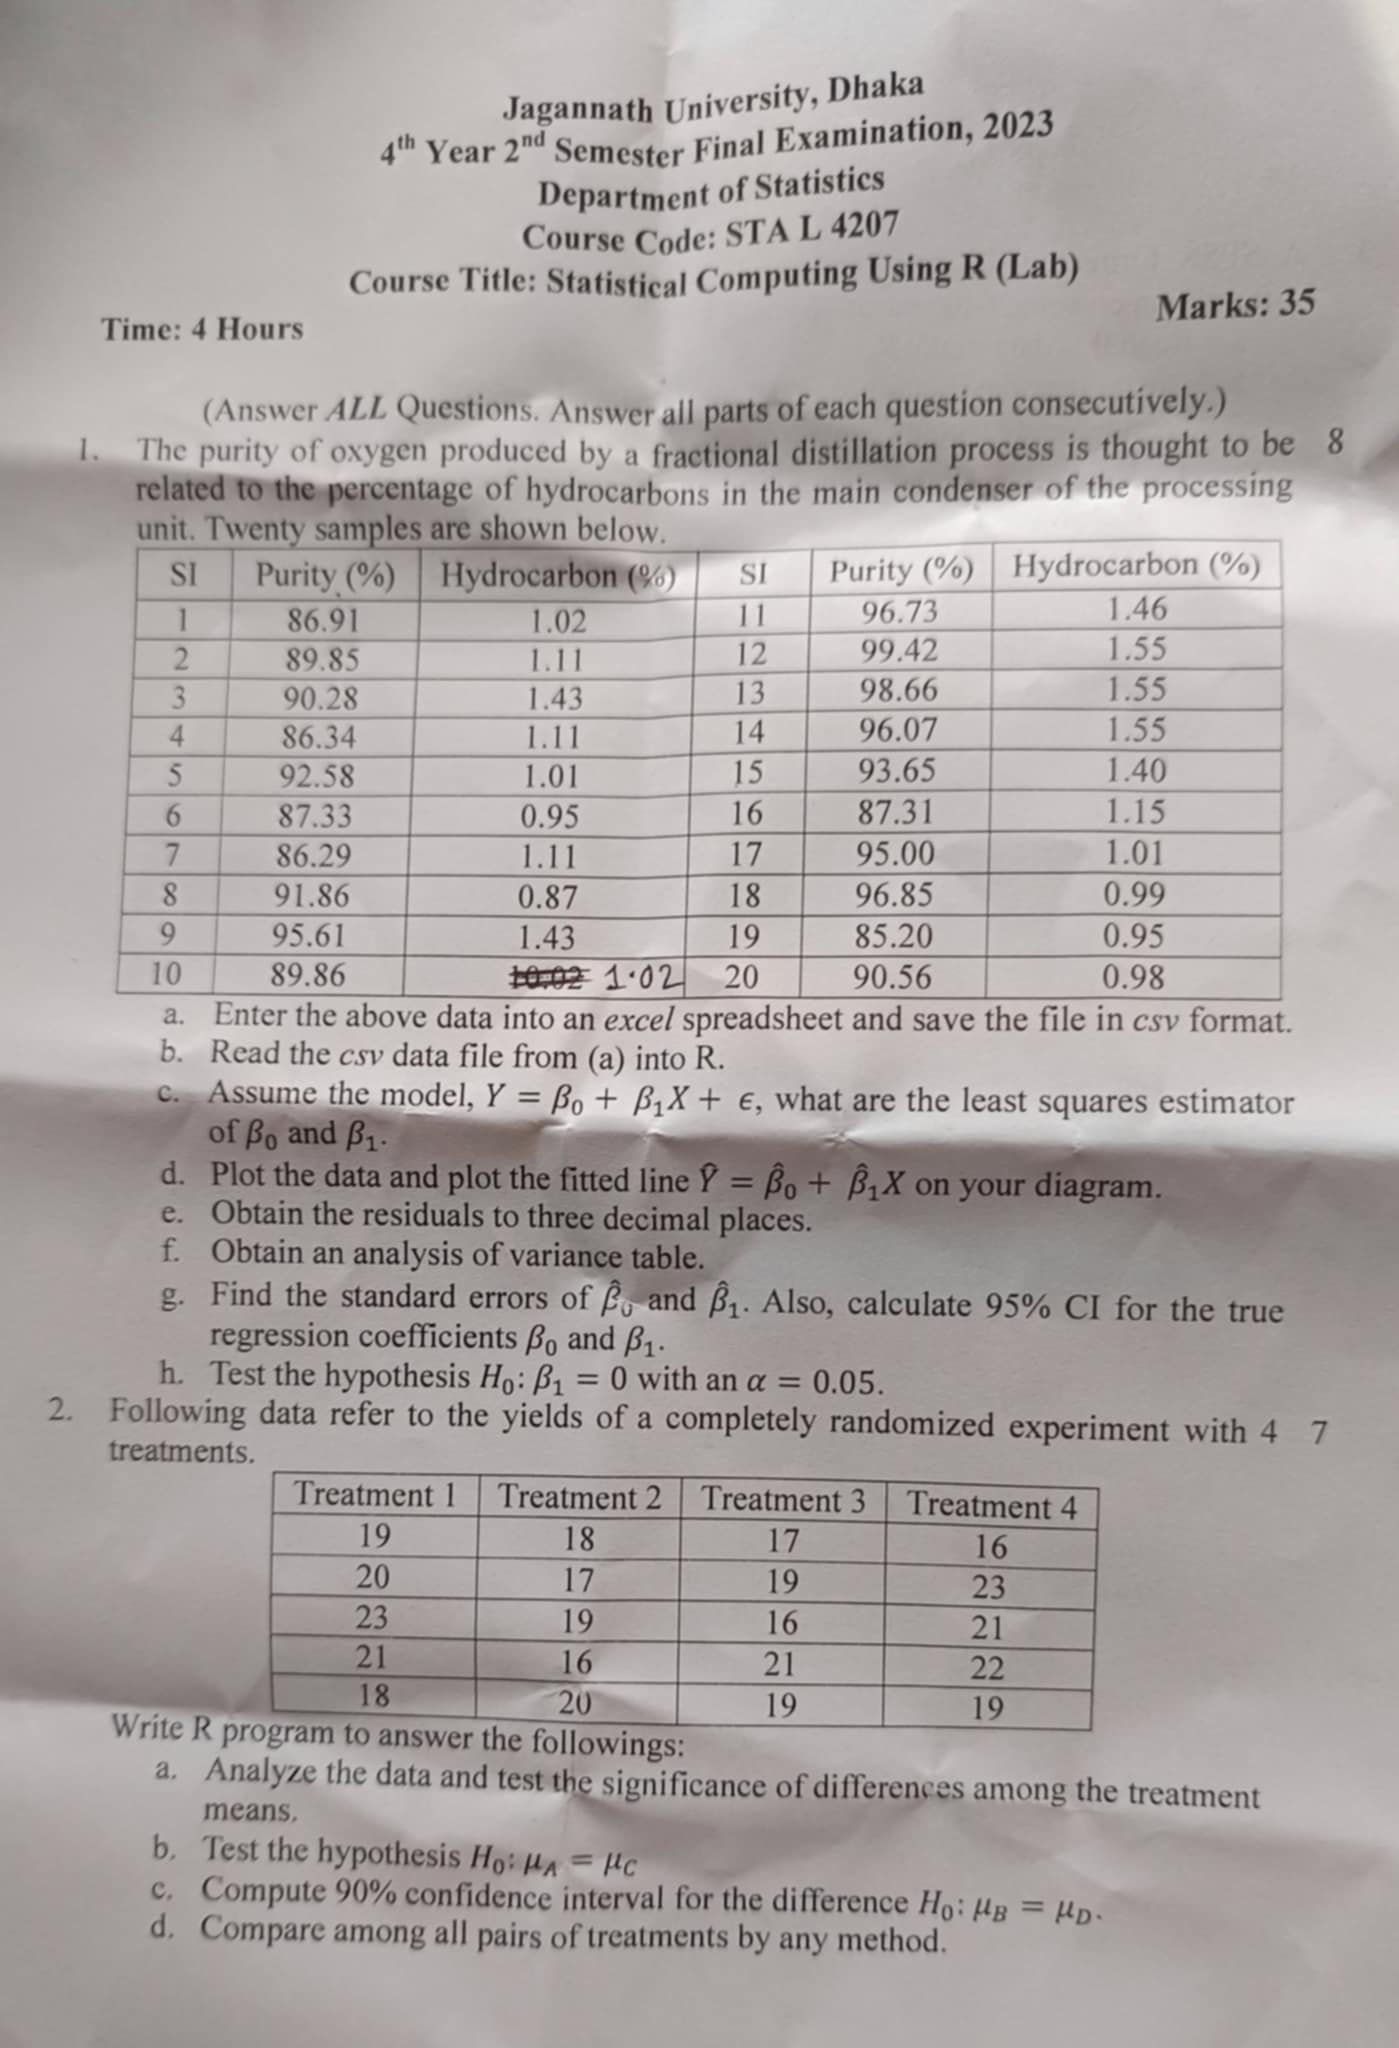

**Answer To the question no 1**

In [ ]:
# (a)&(b)
dat <- read.csv("/content/oxygen_data.csv", header = TRUE)
dim(dat)

[1] 20  3

Since the p-value is significantly less than 0.05, we reject the null hypothesis.
This means there is strong evidence that Hydrocarbon has a statistically significant effect on the dependent variable.

In [ ]:
colnames(dat) #Check columns

[1] "SI"             "Purity..."      "Hydrocarbon..."

In [ ]:
names(dat) <- c("si", "Purity", "Hydrocarbon") #names of the columns

In [ ]:
#(c)
reg_model <- lm(Purity ~ Hydrocarbon, data = dat) #Fit the regresion model
summary(reg_model) #summary of the model


Call:
lm(formula = Purity ~ Hydrocarbon, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6724 -3.2113 -0.0626  2.5783  7.3037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   77.863      4.199  18.544 3.54e-13 ***
Hydrocarbon   11.801      3.485   3.386  0.00329 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.597 on 18 degrees of freedom
Multiple R-squared:  0.3891,	Adjusted R-squared:  0.3552 
F-statistic: 11.47 on 1 and 18 DF,  p-value: 0.003291


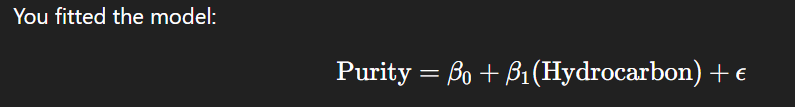

There is a significant positive relationship between Hydrocarbon and Purity.
As Hydrocarbon increases, Purity increases by approximately 11.8 units for every 1-unit rise.
The model explains about 39% of the variability in Purity and is statistically significant.

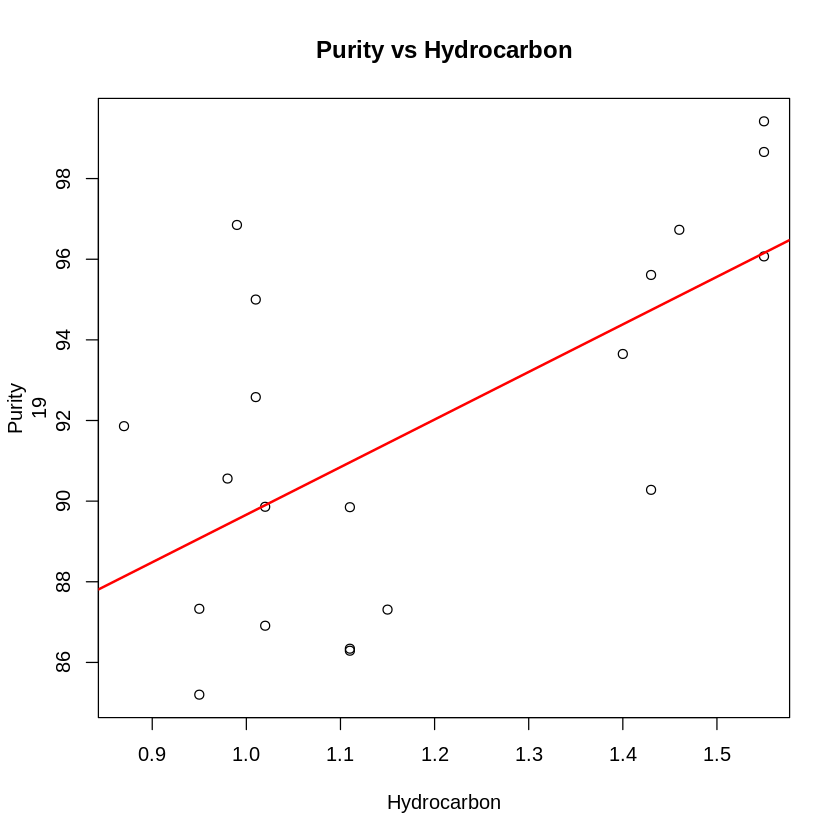

In [ ]:
#(d)
plot(dat$Hydrocarbon, dat$Purity, main="Purity vs Hydrocarbon",
xlab = "Hydrocarbon", ylab = c("Purity", pch = 19))
abline(reg_model, col = "red", lwd = 2)

In [ ]:
# e. Residuals to three decimals
residuals_3d <- round(residuals(reg_model), 3)
print(residuals_3d)

     1      2      3      4      5      6      7      8      9     10     11 
-2.990 -1.112 -4.459 -4.622  2.798 -1.744 -4.672  3.730  0.871 -0.040  1.637 
    12     13     14     15     16     17     18     19     20 
 3.265  2.505 -0.085 -0.735 -4.124  5.218  7.304 -3.874  1.132 


In [ ]:
anova(reg_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Hydrocarbon,1,148.3130,148.31296,11.4658,0.003291122
Residuals,18,232.8344,12.93524,NA,NA


In [ ]:
confint(reg_model, level = 0.95)

,2.5 %,97.5 %
(Intercept),69.041747,86.68482
Hydrocarbon,4.479066,19.12299


In [ ]:
#(f)
summary_df <- summary(reg_model)$coefficients
confint_df <- confint(reg_model, level = 0.95)

# Combine into one data frame
results <- cbind(
  Estimate = summary_df[, "Estimate"],
  SE = summary_df[, "Std. Error"],
  CI_lower = confint_df[, 1],
  CI_upper = confint_df[, 2]
)

print(round(results, 4))


            Estimate     SE CI_lower CI_upper
(Intercept)  77.8633 4.1989  69.0417  86.6848
Hydrocarbon  11.8010 3.4851   4.4791  19.1230


In [ ]:
# h. Hypothesis Test: H0: β1 = 0
summary(reg_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),77.86328,4.198888,18.543786,3.537382e-13
Hydrocarbon,11.80103,3.485119,3.386119,3.291122e-03


## **Question 2:**

In [5]:
# Data Entry
b <- factor(rep(1:5, times = 4))     # Block factor
t <- factor(rep(c("t1", "t2", "t3", "t4"), each = 5))  # Treatment factor
y <- c(19, 20, 23, 21, 18,
       18, 17, 19, 16, 20,
       17, 19, 16, 21, 19,
       16, 23, 21, 22, 19)

dat <- data.frame(b, t, y)
dat


b,t,y
<fct>,<fct>,<dbl>
1,t1,19
2,t1,20
3,t1,23
4,t1,21
5,t1,18
1,t2,18
2,t2,17
3,t2,19
4,t2,16


In [6]:
#(a) One-way ANOVA


anova_model <- aov(yield ~ treatment, data = dat)
summary(anova_model)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3   20.4   6.800   1.537  0.243
Residuals   16   70.8   4.425               

In [7]:
#(b) Test hypothesis H0: μA = μC
##    (Treatment 1 vs Treatment 3)


t1 <- y[t == "t1"]
t3 <- y[t == "t3"]

t.test(t1, t3, var.equal = TRUE)


	Two Sample t-test

data:  t1 and t3
t = 1.4697, df = 8, p-value = 0.1798
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.024267  4.624267
sample estimates:
mean of x mean of y 
     20.2      18.4 


In [8]:

#(c) 90% CI for the difference μB – μD
#    (Treatment 2 vs Treatment 4)


t2 <- y[t == "t2"]
t4 <- y[t == "t4"]

t.test(t2, t4, var.equal = TRUE, conf.level = 0.90)


	Two Sample t-test

data:  t2 and t4
t = -1.5403, df = 8, p-value = 0.1621
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -4.8559658  0.4559658
sample estimates:
mean of x mean of y 
     18.0      20.2 


In [10]:
### (d) Compare all pairs of treatments Using Tukey HSD test
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = yield ~ treatment, data = dat)

$treatment
             diff       lwr      upr     p adj
B-A -2.200000e+00 -6.006339 1.606339 0.3786463
C-A -1.800000e+00 -5.606339 2.006339 0.5446744
D-A  3.552714e-15 -3.806339 3.806339 1.0000000
C-B  4.000000e-01 -3.406339 4.206339 0.9901891
D-B  2.200000e+00 -1.606339 6.006339 0.3786463
D-C  1.800000e+00 -2.006339 5.606339 0.5446744


## **Question 3: SPSS Data Manipulation**

In [ ]:
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



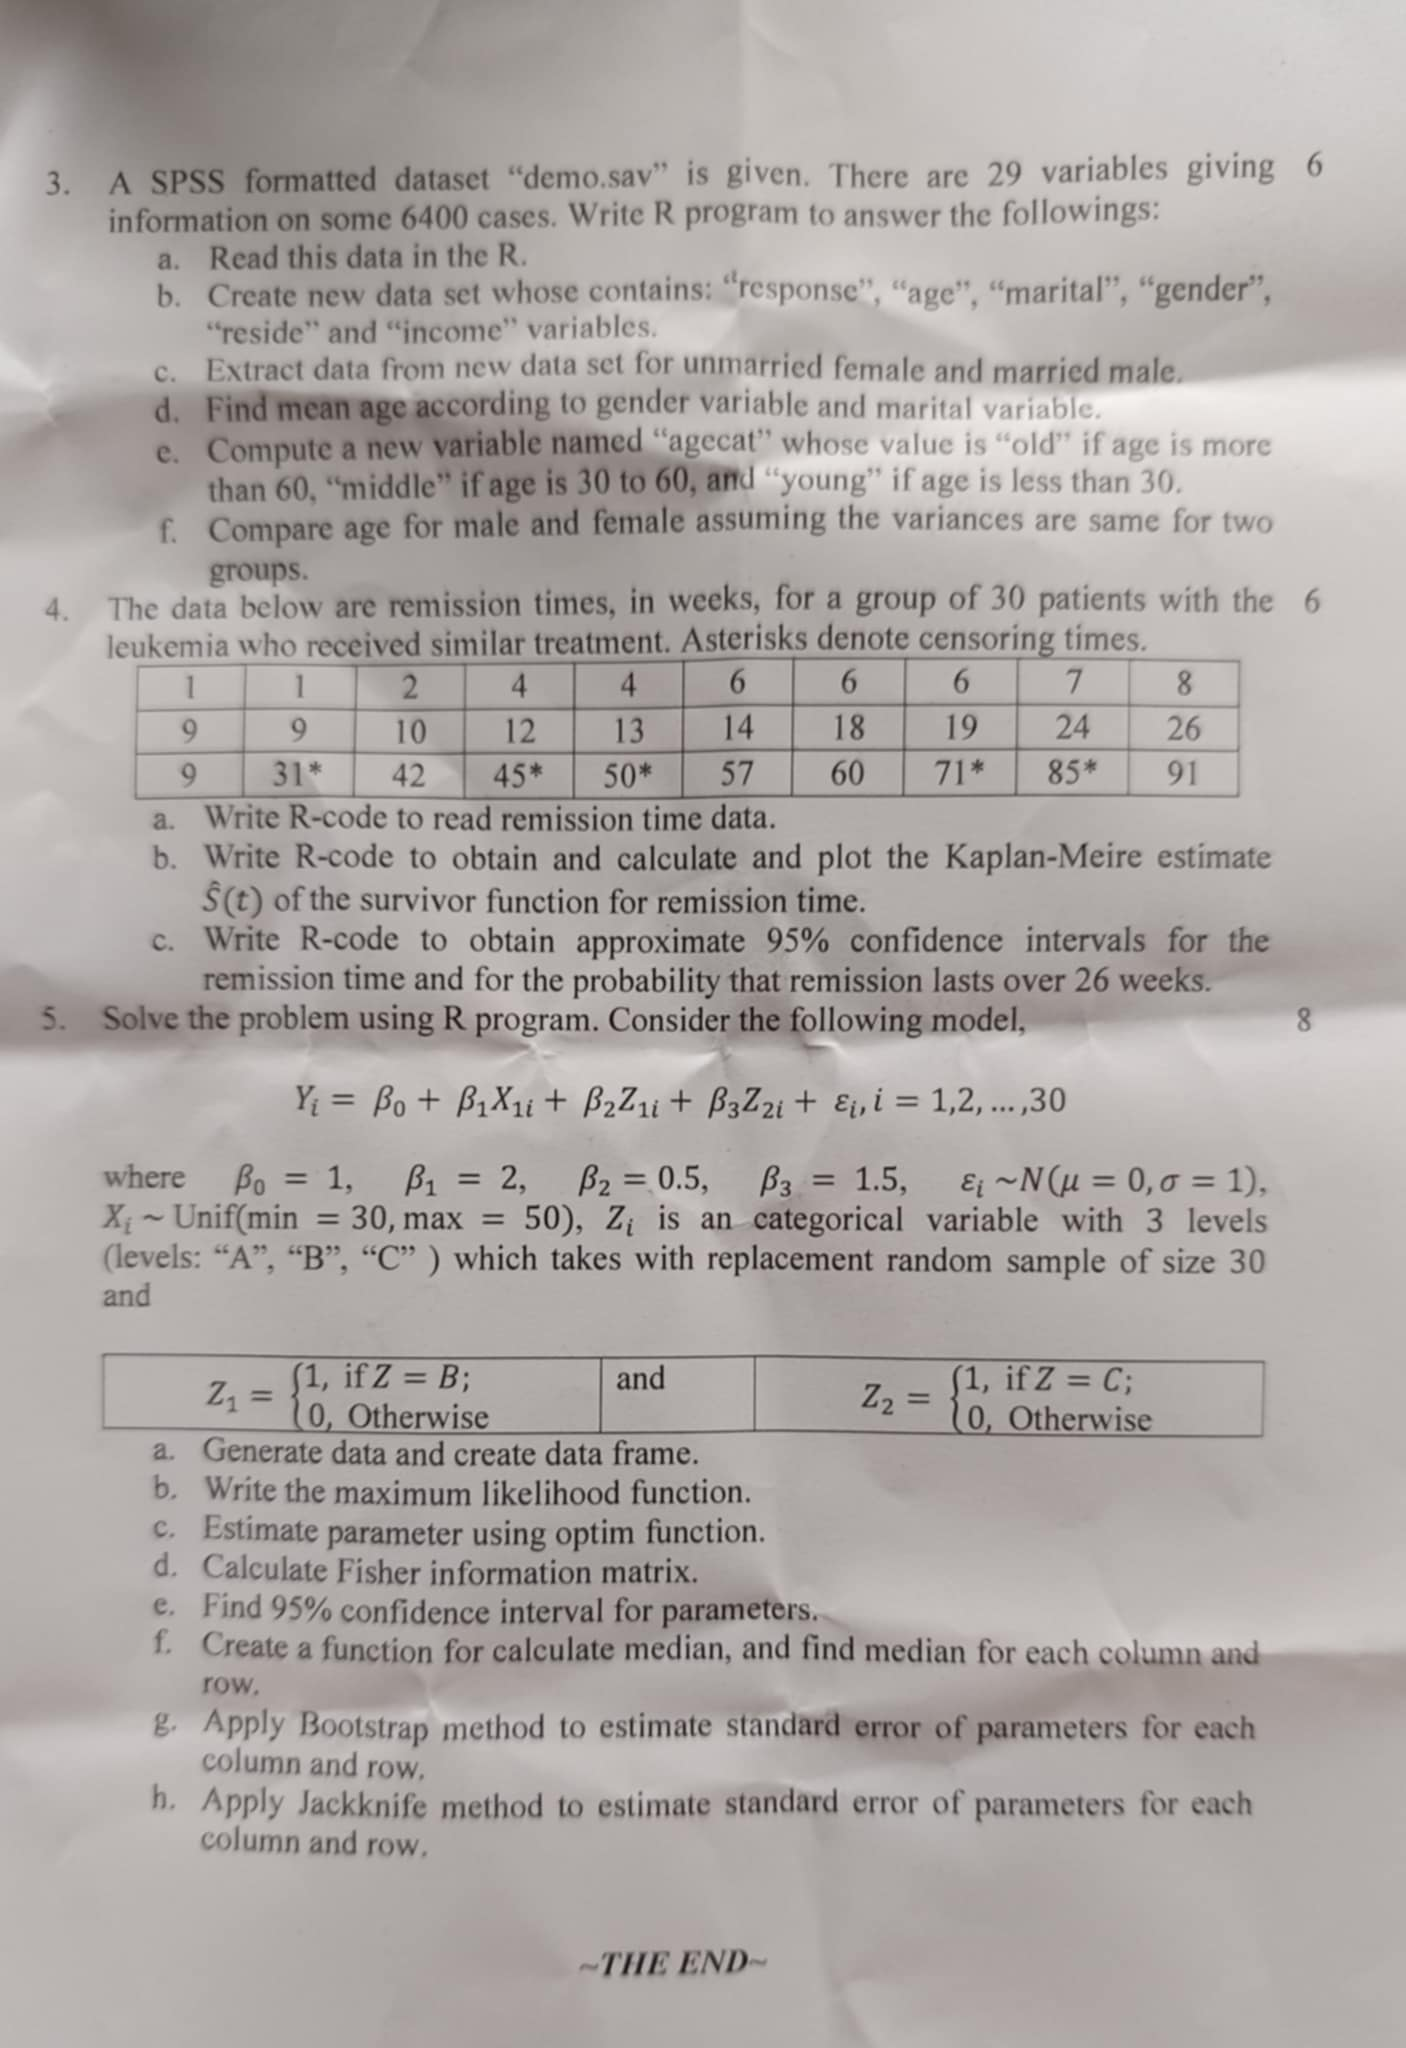

In [ ]:
#(a)
library(haven)
dat <- read_sav("/content/demo.sav")
dat

ID,Response,Age,MaritalStatus,Gender,Reside,Income,Education,Employment,Children,⋯,WorkHours,CommuteTime,InternetUse,SocialMediaUse,Volunteer,PetOwner,TechSavvy,City,Country,ZipCode
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Yes,68,Single,Male,Urban,11838.87,Bachelor,Student,3,⋯,13,14,2,4,Yes,Yes,Medium,Jenniferchester,Turks and Caicos Islands,78101
2,No,62,Widowed,Female,Rural,34834.42,High School,Retired,3,⋯,31,26,4,5,Yes,Yes,High,Gonzalezmouth,Nauru,32185
3,Yes,52,Divorced,Male,Urban,71043.57,PhD,Employed,2,⋯,34,71,11,0,No,Yes,Low,Lake Shannonside,Congo,70160
4,Yes,56,Single,Female,Suburban,44834.55,PhD,Student,0,⋯,22,116,10,2,No,No,High,Johnstad,Saint Lucia,82066
5,Yes,39,Married,Female,Rural,60746.80,Bachelor,Retired,3,⋯,32,14,10,1,No,No,Low,Lake Jennifertown,Belarus,06275
6,No,58,Married,Male,Urban,56412.49,Bachelor,Unemployed,1,⋯,1,116,0,5,No,No,High,New Colleen,Saint Barthelemy,37259
7,Yes,22,Widowed,Female,Suburban,47136.89,Bachelor,Unemployed,0,⋯,59,71,2,1,Yes,No,High,West Sarah,Philippines,80371
8,Yes,59,Divorced,Male,Suburban,25116.34,PhD,Student,2,⋯,12,114,1,5,No,Yes,High,West Amber,Togo,16133
9,Yes,40,Married,Male,Urban,30111.95,PhD,Unemployed,0,⋯,29,3,0,2,Yes,Yes,Low,Lindaport,Isle of Man,81369


In [ ]:
colnames(dat)

[1] "ID"             "Response"       "Age"            "MaritalStatus" 
 [5] "Gender"         "Reside"         "Income"         "Education"     
 [9] "Employment"     "Children"       "Satisfaction"   "HealthStatus"  
[13] "BMI"            "ExerciseFreq"   "Smoking"        "Alcohol"       
[17] "Diet"           "SleepHours"     "StressLevel"    "WorkHours"     
[21] "CommuteTime"    "InternetUse"    "SocialMediaUse" "Volunteer"     
[25] "PetOwner"       "TechSavvy"      "City"           "Country"       
[29] "ZipCode"

In [ ]:
#(b)
new_dat <- dat[, c("Response", "Age", "MaritalStatus", "Gender", "Reside", "Income")]
new_dat

Response,Age,MaritalStatus,Gender,Reside,Income
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Yes,68,Single,Male,Urban,11838.87
No,62,Widowed,Female,Rural,34834.42
Yes,52,Divorced,Male,Urban,71043.57
Yes,56,Single,Female,Suburban,44834.55
Yes,39,Married,Female,Rural,60746.80
No,58,Married,Male,Urban,56412.49
Yes,22,Widowed,Female,Suburban,47136.89
Yes,59,Divorced,Male,Suburban,25116.34
Yes,40,Married,Male,Urban,30111.95


In [ ]:
table(new_dat$MaritalStatus)
table(new_dat$Gender)


Divorced  Married   Single  Widowed 
    1564     1551     1650     1635 


Female   Male 
  3222   3178 

In [ ]:
#(c)
subset_dat <- subset(new_dat, (Gender == "Female" & MaritalStatus == "Single") |
                                  (Gender == "Male" & MaritalStatus == "Married"))
subset_dat

Response,Age,MaritalStatus,Gender,Reside,Income
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Yes,56,Single,Female,Suburban,44834.55
No,58,Married,Male,Urban,56412.49
Yes,40,Married,Male,Urban,30111.95
Yes,39,Single,Female,Rural,51172.93
No,26,Single,Female,Urban,38570.20
Yes,30,Married,Male,Urban,37496.47
No,34,Single,Female,Suburban,36165.14
Yes,39,Single,Female,Urban,33782.91
No,64,Married,Male,Urban,34734.01


In [ ]:
#(d)
aggregate(Age~Gender + MaritalStatus, data = new_dat, FUN = mean)

Gender,MaritalStatus,Age
<chr>,<chr>,<dbl>
Female,Divorced,42.92645
Male,Divorced,43.28644
Female,Married,44.15287
Male,Married,42.99347
Female,Single,43.59549
Male,Single,43.87113
Female,Widowed,43.01465
Male,Widowed,43.14338


In [ ]:
#(e)
new_dat$agecat <- with(new_dat, ifelse(Age < 30, "young",
ifelse(Age <= 60, "middle", "old")))
new_dat

Response,Age,MaritalStatus,Gender,Reside,Income,agecat
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Yes,68,Single,Male,Urban,11838.87,old
No,62,Widowed,Female,Rural,34834.42,old
Yes,52,Divorced,Male,Urban,71043.57,middle
Yes,56,Single,Female,Suburban,44834.55,middle
Yes,39,Married,Female,Rural,60746.80,middle
No,58,Married,Male,Urban,56412.49,middle
Yes,22,Widowed,Female,Suburban,47136.89,young
Yes,59,Divorced,Male,Suburban,25116.34,middle
Yes,40,Married,Male,Urban,30111.95,middle


In [ ]:
#(f)
t.test(Age ~ Gender, data = new_dat, var.equal = TRUE)



	Two Sample t-test

data:  Age by Gender
t = 0.25585, df = 6398, p-value = 0.7981
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -0.6339358  0.8242444
sample estimates:
mean in group Female   mean in group Male 
            43.42272             43.32756 


 Question 4: Kaplan-Meier Survival Analysis

In [ ]:
#1: define remission times (30 values)
remission_time <- c(
  1, 1, 2, 4, 4, 6, 6, 6, 7, 8,
  9, 9, 10, 12, 13, 14, 18, 19, 24, 26,
  9, 31, 42, 45, 50, 57, 60, 71, 85, 91
)

#2: define status vector (1 = event occurred, 0 = censored)
status <- rep(1, 30)  # all events
status[c(22, 24, 25, 28, 29)] <- 0  # mark censored cases


In [ ]:
remission_time

[1]  1  1  2  4  4  6  6  6  7  8  9  9 10 12 13 14 18 19 24 26  9 31 42 45 50
[26] 57 60 71 85 91

In [ ]:
status

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1

In [ ]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘litedown’, ‘corrplot’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [ ]:
install.packages("survival")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(survminer)
library(survival)
library(ggplot2)

In [ ]:
km_fit <- survfit(Surv(time = remission_time, event = status)~1, type = "kaplan-meier", conf.type = "log-log")
summary(km_fit)

Call: survfit(formula = Surv(time = remission_time, event = status) ~ 
    1, type = "kaplan-meier", conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     30       2    0.933  0.0455       0.7589        0.983
    2     28       1    0.900  0.0548       0.7212        0.967
    4     27       2    0.833  0.0680       0.6450        0.927
    6     25       3    0.733  0.0807       0.5369        0.857
    7     22       1    0.700  0.0837       0.5026        0.831
    8     21       1    0.667  0.0861       0.4692        0.805
    9     20       3    0.567  0.0905       0.3733        0.721
   10     17       1    0.533  0.0911       0.3428        0.691
   12     16       1    0.500  0.0913       0.3130        0.661
   13     15       1    0.467  0.0911       0.2839        0.630
   14     14       1    0.433  0.0905       0.2556        0.599
   18     13       1    0.400  0.0894       0.2280        0.567
   19     12       1    0.367  0.0880      

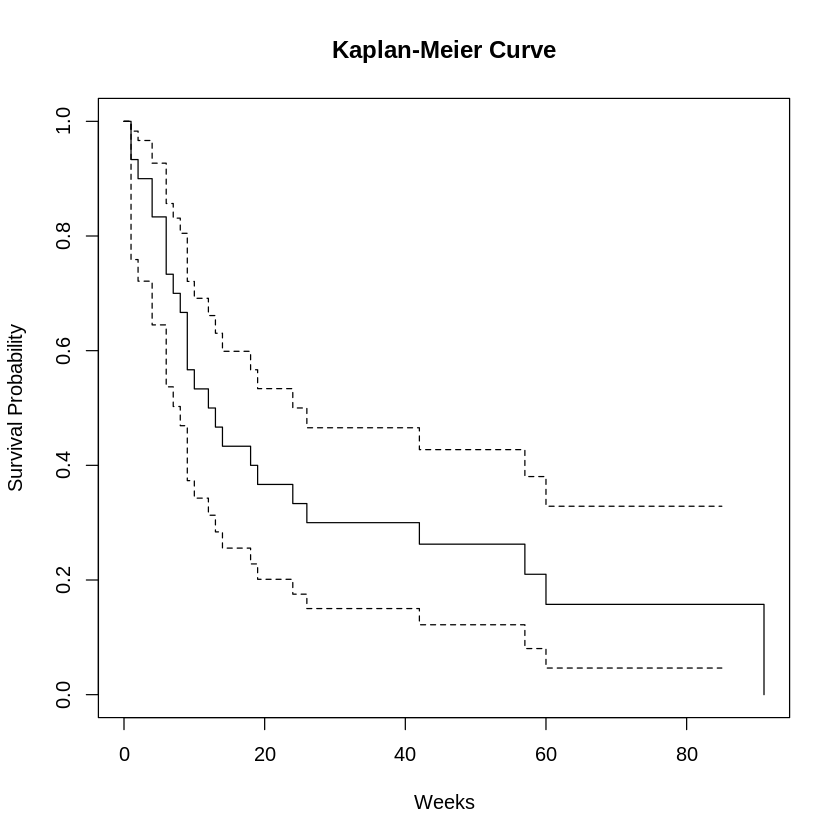

In [ ]:
# Plot
plot(km_fit, xlab = "Weeks", ylab = "Survival Probability", main = "Kaplan-Meier Curve")

In [ ]:
summary(km_fit, times = 26)  # Prob(remission > 26 weeks)

# CI from survfit is already included:
fit$lower
fit$upper


Call: survfit(formula = Surv(time = remission_time, event = status) ~ 
    1, type = "kaplan-meier", conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   26     10      21      0.3  0.0837         0.15        0.466

NULL

NULL

Question 5:

In [ ]:
set.seed(123)
n <- 30
X <- runif(n, 30, 50)
Z <- sample(c("A", "B", "C"), n, replace = TRUE)
Z1 <- ifelse(Z == "B", 1, 0)
Z2 <- ifelse(Z == "C", 1, 0)
epsilon <- rnorm(n, 0, 1)
Y <- 1 + 2*X + 0.5*Z1 + 1.5*Z2 + epsilon
dat <- data.frame(Y, X, Z1, Z2, Z)
dat

Y,X,Z1,Z2,Z
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
73.38984,35.75155,0,0,A
92.88081,45.76610,1,0,B
79.18887,38.17954,0,1,C
93.59337,47.66035,1,0,B
97.84690,48.80935,0,0,A
64.60881,30.91113,0,1,C
82.40371,40.56211,0,1,C
97.13131,47.84838,0,0,A
85.35758,41.02870,0,1,C


In [ ]:
## write the loglikelood function
loglikFun <- function(params, data){
    beta0 <- params[1]
    beta1 <- params[2]
    beta2 <- params[3]
    beta3 <- params[4]
    sigma <- abs(params[5])

    mu <- beta0 + beta1 * dat$X + beta2 *dat$Z1 + beta3 * dat$Z2
    loglik <- -sum(dnorm(data$Y, mean = mu, sd = sigma, log = TRUE))
    return(loglik)
}

In [ ]:
#Estimate parameters optimum values
start_vals <- c(0, 0, 0, 0, 1)
fit <- optim(start_vals, loglikFun, data = dat)
params_hat <- fit$par
names(params_hat) <- c("beta0", "beta1", "beta2", "beta3", "sigma")
print(params_hat)

     beta0      beta1      beta2      beta3      sigma 
-0.5213574  2.0496120 -0.9530223  0.7674484  1.0815045 


In [ ]:
library(numDeriv)
fisher_infoo <- hessian(func = loglikFun, x = params_hat, data = dat)
fisher_inve <- solve(fisher_infoo)
fisher_inve

2.89159982,-0.067004155,-0.026395839,-0.171314677,-0.117522865
-0.06700416,0.001603750,-0.001639954,0.001822732,0.002967198
-0.02639584,-0.001639954,0.269757547,0.099678690,-0.017407346
-0.17131468,0.001822732,0.099678690,0.221162500,-0.011725252
-0.11752287,0.002967198,-0.017407346,-0.011725252,0.024246296


In [ ]:
se <- sqrt(diag(fisher_inve))
CI_lower <- params_hat - 1.96 * se
CI_upper <- params_hat + 1.96 * se

conf_int <- cbind(Estimate = params_hat, SE = se, "CI_Lower" = CI_lower, "CI_upper" = CI_upper)
round(conf_int, 4)

,Estimate,SE,CI_Lower,CI_upper
beta0,-0.5214,1.7005,-3.8543,2.8116
beta1,2.0496,0.0400,1.9711,2.1281
beta2,-0.9530,0.5194,-1.9710,0.0650
beta3,0.7674,0.4703,-0.1543,1.6892
sigma,1.0815,0.1557,0.7763,1.3867


In [ ]:
get_med <- function(df){
    list (
        col_med <- apply(df, 2, median),
        row_med <- apply(df, 1, median)
    )
}
med_result <- get_med(dat[, c("Y", "X", "Z1", "Z2")])
print(med_result)

[[1]]
       Y        X       Z1       Z2 
84.83327 41.66775  0.00000  0.00000 

[[2]]
 [1] 17.87578 23.38305 19.58977 24.33017 24.40467 15.95556 20.78105 23.92419
 [9] 21.01435 20.06615 24.56833 20.03334 21.77571 20.72633 16.52925 24.49825
[17] 17.96088 15.42060 18.77921 24.54504 24.39539 22.42803 21.40507 25.44270
[25] 21.55706 22.08530 20.94066 20.94142 18.39160 16.47114



In [ ]:
##Boostrap standard error estimation
B <- 1000
bo_esti <- replicate(B, {
    idx <- sample(1:n, replace=TRUE)
    d_bo <- dat[idx, ]
    optim(start_vals, loglikFun, data = d_bo)$par
})

bo_se <- apply(bo_esti, 1, sd)
names(bo_se) <- c("beta0", "beta1", "beta2", "beta3", "sigma")
round(bo_se, 3)

beta0  beta1  beta2  beta3  sigma 
31.525  0.751  9.679  9.208  2.329

In [ ]:
# Jackknife standard error estimation
jackknife_estimates <- sapply(1:n, function(i) {
    d_jack <- dat[-i, ]
    optim(start_vals, loglikFun, data = d_jack)$par
})

# Convert to matrix
jack_est_mat <- t(jackknife_estimates)
jackknife_mean <- colMeans(jack_est_mat)

# Jackknife SE
jackknife_se <- sqrt((n - 1) / n * colSums((jack_est_mat - matrix(jackknife_mean, nrow = n, ncol = 5, byrow = TRUE))^2))
names(jackknife_se) <- c("beta0", "beta1", "beta2", "beta3", "sigma")
jackknife_se


beta0     beta1     beta2     beta3     sigma 
67.358007  1.483658 25.087233 23.918037 26.517414

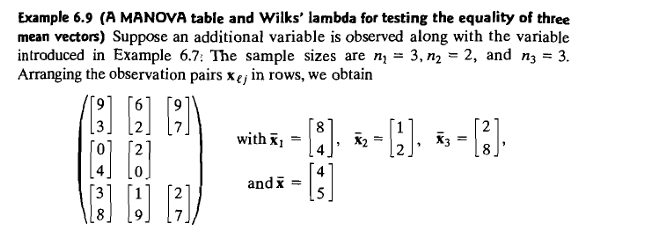

In [ ]:
y1 <- c(9, 6, 9, 0, 2, 3, 1, 2)
y2 <- c(3, 2, 7, 4, 0, 8, 9, 7)
trt <- c(rep("trt1", 3), rep("trt2", 2), rep("trt3", 3))
dat <- data.frame(y1, y2, trt)
dat

y1,y2,trt
<dbl>,<dbl>,<chr>
9,3,trt1
6,2,trt1
9,7,trt1
0,4,trt2
2,0,trt2
3,8,trt3
1,9,trt3
2,7,trt3


In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(car)
res.man <- lm(cbind(y1, y2)~trt)
man_fit <- car::Anova(res.man)
summary(man_fit)


Type II MANOVA Tests:

Sum of squares and products for error:
   y1 y2
y1 10  1
y2  1 24

------------------------------------------
 
Term: trt 

Sum of squares and products for the hypothesis:
    y1  y2
y1  78 -12
y2 -12  48

Multivariate Tests: trt
                 Df test stat  approx F num Df den Df    Pr(>F)   
Pillai            2  1.540788  8.388227      4     10 0.0030962 **
Wilks             2  0.038455  8.198860      4      8 0.0062341 **
Hotelling-Lawley  2  9.941423  7.456067      4      6 0.0164318 * 
Roy               2  8.076385 20.190963      2      5 0.0040292 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
summary.aov(res.man)


 Response y1 :
            Df Sum Sq Mean Sq F value   Pr(>F)   
trt          2     78      39    19.5 0.004353 **
Residuals    5     10       2                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response y2 :
            Df Sum Sq Mean Sq F value  Pr(>F)  
trt          2     48    24.0       5 0.06415 .
Residuals    5     24     4.8                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


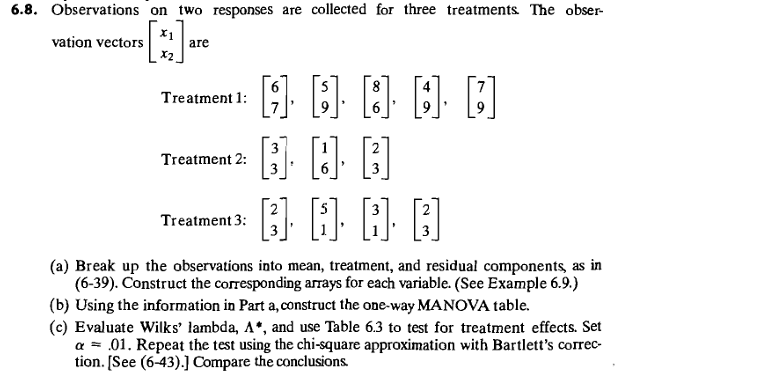

In [ ]:
# (a)
x1 <- c(6, 5, 8, 4, 7, 3, 1, 2, 2, 5, 3, 2)
x2 <- c(7, 9, 6, 9, 9, 3, 6, 3, 3, 1, 1, 3)
trt <-c(rep("T1", 5), rep("T2", 3), rep("T3", 4))

dat <- data.frame(x1, x2, trt)
dat

x1,x2,trt
<dbl>,<dbl>,<chr>
6,7,T1
5,9,T1
8,6,T1
4,9,T1
7,9,T1
3,3,T2
1,6,T2
2,3,T2
2,3,T3


In [ ]:
# Grand means
grand_mean <- colMeans(dat[, c("x1", "x2")])
grand_mean
# Group means
group_means <- aggregate(cbind(x1, x2) ~ trt, data = dat, FUN = mean)
group_means
# Residuals
dat$res_x1 <- dat$x1 - ave(dat$x1, dat$trt)
dat$res_x2 <- dat$x2 - ave(dat$x2, dat$trt)
dat$res_x1
dat$res_x2

x1 x2 
 4  5

trt,x1,x2
<chr>,<dbl>,<dbl>
T1,6,8
T2,2,4
T3,3,2


[1]  0 -1  2 -2  1  1 -1  0 -1  2  0 -1

[1] -1  1 -2  1  1 -1  2 -1  1 -1 -1  1

In [ ]:
library(car)
res.man <- lm(cbind(x1, x2)~trt)
man_fit <- car::Anova(res.man)
summary(man_fit)


Type II MANOVA Tests:

Sum of squares and products for error:
    x1  x2
x1  18 -13
x2 -13  18

------------------------------------------
 
Term: trt 

Sum of squares and products for the hypothesis:
   x1 x2
x1 36 48
x2 48 84

Multivariate Tests: trt
                 Df test stat approx F num Df den Df     Pr(>F)    
Pillai            2  1.131917  5.86767      4     18  0.0033316 ** 
Wilks             2  0.036190 17.02656      4     16 1.2827e-05 ***
Hotelling-Lawley  2 21.987097 38.47742      4     14 2.0776e-07 ***
Roy               2 21.773759 97.98192      2      9 7.7901e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# MANOVA model
manova_fit <- manova(cbind(x1, x2) ~ trt, data = dat)

# Wilks' Lambda test
summary(manova_fit, test = "Wilks")


          Df   Wilks approx F num Df den Df    Pr(>F)    
trt        2 0.03619   17.027      4     16 1.283e-05 ***
Residuals  9                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
install.packages("emmeans")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’




In [ ]:
# Load necessary library
library(emmeans)

# Fit multivariate linear model
fit <- lm(cbind(x1, x2)~trt)
# Estimated marginal means
emm_f1 <- emmeans(fit, ~trt)


# Pairwise comparisons with Bonferroni correction
pairs(emm_f1, adjust = "bonferroni")



 contrast estimate    SE df t.ratio p.value
 T1 - T2       4.0 0.385  9  10.392  <.0001
 T1 - T3       4.5 0.354  9  12.728  <.0001
 T2 - T3       0.5 0.403  9   1.242  0.7368

Results are averaged over the levels of: rep.meas 
P value adjustment: bonferroni method for 3 tests 

In [ ]:
trt1 <- c(23,36,31, 33)
trt2 <- c(42,26,47, 34)
trt3 <- c(47,43,43,39)

y <- c(trt1, trt2, trt3)

x <- c(rep("trt1",4), rep("trt2",4), rep("trt3",4))


res <- lm(y~x)
summary(res)
anova(res)



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.250  -3.438   0.125   4.188   9.750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   30.750      3.247   9.471 5.62e-06 ***
xtrt2          6.500      4.592   1.416   0.1906    
xtrt3         12.250      4.592   2.668   0.0257 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.494 on 9 degrees of freedom
Multiple R-squared:  0.4419,	Adjusted R-squared:  0.3179 
F-statistic: 3.563 on 2 and 9 DF,  p-value: 0.07247


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,2,300.5,150.25000,3.563241,0.07247077
Residuals,9,379.5,42.16667,NA,NA


| Block | trt1 | trt2 | trt3 |
| ----- | ---- | ---- | ---- |
| 1     | 23   | 42   | 47   |
| 2     | 36   | 26   | 43   |
| 3     | 31   | 47   | 43   |
| 4     | 33   | 34   | 39   |


In [ ]:
b <- factor(rep(1:4, times = 3))
t<- factor(rep(c("trt1", "trt2", "trt3"), each=4))
y <- c(23,36, 31, 33, 42, 26, 47, 34, 47, 43, 43, 39)

rbd_dat <- data.frame(b, t, y)

In [ ]:
r_rbd <- lm(y~t+b, data = rbd_dat)
summary(r_rbd)
anova(r_rbd)


Call:
lm(formula = y ~ t + b, data = rbd_dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2500 -3.1458  0.2083  4.0417  7.2500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   31.083      5.208   5.968 0.000992 ***
ttrt2          6.500      5.208   1.248 0.258512    
ttrt3         12.250      5.208   2.352 0.056897 .  
b2            -2.333      6.014  -0.388 0.711414    
b3             3.000      6.014   0.499 0.635646    
b4            -2.000      6.014  -0.333 0.750775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.365 on 6 degrees of freedom
Multiple R-squared:  0.5213,	Adjusted R-squared:  0.1224 
F-statistic: 1.307 on 5 and 6 DF,  p-value: 0.3722


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
t,2,300.5,150.25,2.7695853,0.1405821
b,3,54.0,18.00,0.3317972,0.8032309
Residuals,6,325.5,54.25,NA,NA


In [ ]:
b <- factor(rep(1:5, times = 5))
t<- factor(rep(c("trt1", "trt2", "trt3", "trt4", "trt5"), each=5))
y <- c(18, 17, 16, 16, 16, 20, 19, 17, 16, 16, 20, 19, 18, 17, 15, 21, 20, 19, 18,
17, 21, 20, 20, 18, 16)

rbd_dat <- data.frame(b, t, y)
rbd_dat

b,t,y
<fct>,<fct>,<dbl>
1,trt1,18
2,trt1,17
3,trt1,16
4,trt1,16
5,trt1,16
1,trt2,20
2,trt2,19
3,trt2,17
4,trt2,16


In [ ]:
r_rbd <- lm(y~b+t, data=rbd_dat)
summary(r_rbd)
anova(r_rbd)


Call:
lm(formula = y ~ b + t, data = rbd_dat)

Residuals:
   Min     1Q Median     3Q    Max 
  -1.0   -0.6    0.0    0.2    1.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.6000     0.4025  46.212  < 2e-16 ***
b2           -1.0000     0.4243  -2.357 0.031495 *  
b3           -2.0000     0.4243  -4.714 0.000234 ***
b4           -3.0000     0.4243  -7.071 2.65e-06 ***
b5           -4.0000     0.4243  -9.428 6.19e-08 ***
ttrt2         1.0000     0.4243   2.357 0.031495 *  
ttrt3         1.2000     0.4243   2.828 0.012109 *  
ttrt4         2.4000     0.4243   5.657 3.57e-05 ***
ttrt5         2.4000     0.4243   5.657 3.57e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6708 on 16 degrees of freedom
Multiple R-squared:  0.9077,	Adjusted R-squared:  0.8615 
F-statistic: 19.67 on 8 and 16 DF,  p-value: 6.729e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
b,4,50.0,12.50,27.77778,5.037348e-07
t,4,20.8,5.20,11.55556,1.327193e-04
Residuals,16,7.2,0.45,NA,NA


In [ ]:
b <- factor(rep(1:5, times = 5))
t <- factor(rep(c("trt1", "trt2", "trt3", "trt4", "trt5"), each=5))
y <- c(18, 17, 16, 16, 16, 20, 19, 17, 16, 16, 20, 19, 18, 17, 15, 21, 20, 19, 18, 17, 21, 20, 20, 18, 16)
rbd_dat <- data.frame(b, t, y)



In [ ]:
model <- aov(y ~ b + t, data = rbd_dat)
summary(model)


            Df Sum Sq Mean Sq F value   Pr(>F)    
b            4   50.0   12.50   27.78 5.04e-07 ***
t            4   20.8    5.20   11.56 0.000133 ***
Residuals   16    7.2    0.45                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
library(emmeans)

# Estimated marginal means for treatments
emmeans_result <- emmeans(model, "t")

# Contrast for trt1 - trt4 with 90% CI
contrast_result <- contrast(
  emmeans_result,
  method = list("trt1 - trt4" = c(1, 0, 0, -1, 0)),
  level = 0.90
)

# View result
summary(contrast_result, infer = TRUE)


,contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,trt1 - trt4,-2.4,0.4242641,16,-3.140716,-1.659284,-5.656854,3.570894e-05


In [ ]:
contrast(emmeans_result, method = list("trt1 - trt3" = c(1, 0, -1, 0, 0)))


 contrast    estimate    SE df t.ratio p.value
 trt1 - trt3     -1.2 0.424 16  -2.828  0.0121

Results are averaged over the levels of: b 

In [ ]:
contrast(emmeans_result, method = list("trt2 - trt5" = c(0, 1, 0, 0, -1)))


 contrast    estimate    SE df t.ratio p.value
 trt2 - trt5     -1.4 0.424 16  -3.300  0.0045

Results are averaged over the levels of: b 

In [ ]:
# Install agricolae if not installed
if (!require(agricolae)) {
  install.packages("agricolae")
  library(agricolae)
} else {
  library(agricolae)
}

# Fit the model again (if not done)
model <- aov(y ~ t + b, data = rbd_dat)

# Perform Duncan's Multiple Range Test on treatments
duncan_result <- duncan.test(model, "t", console = TRUE)

# duncan_result contains grouping info for treatments


Loading required package: agricolae

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘agricolae’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘AlgDesign’





Study: model ~ "t"

Duncan's new multiple range test
for y 

Mean Square Error:  0.45 

t,  means

        y       std r  se Min Max Q25 Q50 Q75
trt1 16.6 0.8944272 5 0.3  16  18  16  16  17
trt2 17.6 1.8165902 5 0.3  16  20  16  17  19
trt3 17.8 1.9235384 5 0.3  15  20  17  18  19
trt4 19.0 1.5811388 5 0.3  17  21  18  19  20
trt5 19.0 2.0000000 5 0.3  16  21  18  20  20

Alpha: 0.05 ; DF Error: 16 

Critical Range
        2         3         4         5 
0.8993996 0.9431407 0.9704834 0.9892334 

Means with the same letter are not significantly different.

        y groups
trt4 19.0      a
trt5 19.0      a
trt3 17.8      b
trt2 17.6      b
trt1 16.6      c


In [ ]:
summary(duncan_result)

           Length Class      Mode
statistics 4      data.frame list
parameters 4      data.frame list
duncan     2      data.frame list
means      9      data.frame list
comparison 0      -none-     NULL
groups     2      data.frame list

In [ ]:
# Example CRD data
t <- factor(rep(c("trt1", "trt2", "trt3", "trt4", "trt5", "trt6"), each=5))
y <- c(39,45,28,32,38,26,43,32,40,29,35,28,36,24,31,26,27,30,25,42,24,28,31,29,44,28,36,45,41,25)

crd_dat <- data.frame(t, y)
crd_dat

t,y
<fct>,<dbl>
trt1,39
trt1,45
trt1,28
trt1,32
trt1,38
trt2,26
trt2,43
trt2,32
trt2,40


In [ ]:
model_crd <- aov(y ~ t, data = crd_dat)
summary(model_crd)

            Df Sum Sq Mean Sq F value Pr(>F)
t            5  167.9   33.58   0.676  0.646
Residuals   24 1192.8   49.70               

In [ ]:
library(emmeans)

em_crd <- emmeans(model_crd, pairwise ~ t)

# 90% confidence intervals for pairwise differences
confint(em_crd$contrasts, level = 0.90)

summary(em_crd$contrasts, infer = TRUE, level = 0.95)


,contrast,estimate,SE,df,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,trt1 - trt2,2.4,4.458699,24,-9.896318,14.696318
2,trt1 - trt3,5.6,4.458699,24,-6.696318,17.896318
3,trt1 - trt4,6.4,4.458699,24,-5.896318,18.696318
4,trt1 - trt5,5.2,4.458699,24,-7.096318,17.496318
5,trt1 - trt6,1.4,4.458699,24,-10.896318,13.696318
6,trt2 - trt3,3.2,4.458699,24,-9.096318,15.496318
7,trt2 - trt4,4.0,4.458699,24,-8.296318,16.296318
8,trt2 - trt5,2.8,4.458699,24,-9.496318,15.096318
9,trt2 - trt6,-1.0,4.458699,24,-13.296318,11.296318


,contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,trt1 - trt2,2.4,4.458699,24,-11.385991,16.185991,0.53827356,0.9939363
2,trt1 - trt3,5.6,4.458699,24,-8.185991,19.385991,1.25597165,0.8050345
3,trt1 - trt4,6.4,4.458699,24,-7.385991,20.185991,1.43539617,0.7060412
4,trt1 - trt5,5.2,4.458699,24,-8.585991,18.985991,1.16625939,0.8481376
5,trt1 - trt6,1.4,4.458699,24,-12.385991,15.185991,0.31399291,0.9995359
6,trt2 - trt3,3.2,4.458699,24,-10.585991,16.985991,0.71769809,0.9778603
7,trt2 - trt4,4.0,4.458699,24,-9.785991,17.785991,0.89712261,0.9434644
8,trt2 - trt5,2.8,4.458699,24,-10.985991,16.585991,0.62798583,0.9877444
9,trt2 - trt6,-1.0,4.458699,24,-14.785991,12.785991,-0.22428065,0.9999109


In [ ]:
# Example CRD data
t <- c(rep("A", 4), rep("B", 6), rep("C", 6), rep("D", 4))
y <- c(25,30,21,22,30,34,37,36,39,25,23,25,26,24,25,23,27,29,23,24)

crd_dat <- data.frame(t, y)
crd_dat

t,y
<chr>,<dbl>
A,25
A,30
A,21
A,22
B,30
B,34
B,37
B,36
B,39


In [ ]:
model1 <- aov(y~t, data = crd_dat)
summary(model1)

            Df Sum Sq Mean Sq F value  Pr(>F)   
t            3  324.2  108.07   8.134 0.00163 **
Residuals   16  212.6   13.29                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
library(emmeans)
em_card <-emmeans(model1, "t")

const_res <- contrast(em_card, method = list(
    "A - C" = c(1, 0, -1, 0),
    "B - D" = c(0, 1, 0, -1)
    ), level = 0.95)

summary(const_res, infer = TRUE)

,contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A - C,0.1666667,2.352876,16,-4.821207,5.15454,0.0708353,0.944406675
2,B - D,7.7500000,2.352876,16,2.762126,12.73787,3.2938416,0.004578312


In [ ]:
# Load packages
library(car)

# Step 1: Create the dataset
t <- c(rep("A", 4), rep("B", 6), rep("C", 6), rep("D", 4))
y <- c(25,30,21,22,30,34,37,36,39,25,23,25,26,24,25,23,27,29,23,24)
crd_dat <- data.frame(t = factor(t), y = y)

# Step 2: Fit CRD model (treating A as reference level)
model_crd <- aov(y ~ t, data = crd_dat)

# Step 3: Test specific hypotheses
# i) H0: muA = muC → equivalent to H0: tC = 0  (since muA is baseline)
linearHypothesis(model_crd, "tC = 0")

# ii) H0: muB = muD → equivalent to H0: tB - tD = 0
linearHypothesis(model_crd, "tB - tD = 0")


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,212.6500,NA,NA,NA,NA
2,16,212.5833,1,0.06666667,0.00501764,0.9444067


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,356.7333,NA,NA,NA,NA
2,16,212.5833,1,144.15,10.84939,0.004578312


In [ ]:
model_crd

Call:
   aov(formula = y ~ t, data = crd_dat)

Terms:
                       t Residuals
Sum of Squares  324.2167  212.5833
Deg. of Freedom        3        16

Residual standard error: 3.645059
Estimated effects may be unbalanced